## Using Clustering

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
import numpy as np
from scipy.stats import zscore

In [2]:
ipos_df = pd.read_csv("C:/Users/davir/davigit/Projeto_Intro_CD/datasets/COTAHIST_A2015_2021.csv")
ipo_detail_df = pd.read_excel("C:/Users/davir/davigit/Projeto_Intro_CD/datasets/IPO_details.xlsx")
ipo_rent = pd.read_csv("C:/Users/davir/davigit/Projeto_Intro_CD/datasets/ipo_rent.csv")

#### Dropping NaN data

In [3]:
detailed = pd.concat([ipo_detail_df.set_index('TICKER'), ipo_rent.set_index('TICKER')], axis=1)
detailed = detailed.dropna()

In [4]:
x = 'VOLUME TOTAL (R$)'
detailed['ESTRANGEIROS'] = detailed['ESTRANGEIROS'] * detailed[x]
detailed['VAREJO'] = detailed['VAREJO'] * detailed[x]
detailed['INSTITUCIONAL'] = detailed['INSTITUCIONAL'] * detailed[x]
detailed['OUTROS'] = detailed['OUTROS'] * detailed[x]
detailed['Sum'] = detailed['ESTRANGEIROS'] + detailed['INSTITUCIONAL']

In [5]:
detailed

,PREÇO POR AÇÃO,Nº TOTAL DE INVESTIDORES,VOLUME TOTAL (R$),VAREJO,INSTITUCIONAL,ESTRANGEIROS,OUTROS,1D,15D,today,Sum
TICKER,,,,,,,,,,,
PSVM11,2.22,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,52.702703,17.117117,177.927928,0.000000e+00
WIZS3,12.33,4527,6.028000e+08,5.920787e+07,2.255063e+08,3.143487e+08,3.737112e+06,12.733171,18.410381,-5.515004,5.398550e+08
AALR3,20.00,2035,6.741976e+08,6.304443e+07,2.492294e+08,3.575474e+08,4.376336e+06,-4.000000,-23.750000,-44.050000,6.067768e+08
MOVI3,7.50,1373,6.000838e+08,5.604806e+07,1.852221e+08,2.702926e+08,8.852101e+07,-2.666667,-1.333333,136.000000,4.555147e+08
PARD3,19.00,5042,8.776688e+08,8.823148e+07,4.215041e+08,3.626088e+08,5.324427e+06,8.947368,5.526316,10.000000,7.841129e+08
...,...,...,...,...,...,...,...,...,...,...,...
GGPS3,12.00,0,2.164502e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.666667,1.666667,20.750000,0.000000e+00
SOJA3,9.90,0,4.000000e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,46.464646,52.020202,61.212121,0.000000e+00
CXSE3,9.67,0,4.351500e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.929679,20.475698,23.991727,0.000000e+00


#### Creating a Score with Z-Score
We tried to create a Z-Score that shows a combination of the Z-Score's from the variable columns below. 

In [6]:
columns = ['VOLUME TOTAL (R$)', 'VAREJO', 'INSTITUCIONAL', 'ESTRANGEIROS', 'OUTROS']
list_scores = []
for c in columns:
    list_scores.append(zscore(detailed[c]))

In [7]:
df = pd.DataFrame(data=list_scores)
DF = df.T
DF['Sum'] = 0
for c in range(5):
    DF['Sum'] += abs(DF[c])
cx = pd.DataFrame.to_numpy(DF['Sum'])

In [8]:
detailed['Z-score'] = cx

In [9]:
detailed

,PREÇO POR AÇÃO,Nº TOTAL DE INVESTIDORES,VOLUME TOTAL (R$),VAREJO,INSTITUCIONAL,ESTRANGEIROS,OUTROS,1D,15D,today,Sum,Z-score
TICKER,,,,,,,,,,,,
PSVM11,2.22,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,52.702703,17.117117,177.927928,0.000000e+00,3.724751
WIZS3,12.33,4527,6.028000e+08,5.920787e+07,2.255063e+08,3.143487e+08,3.737112e+06,12.733171,18.410381,-5.515004,5.398550e+08,2.331766
AALR3,20.00,2035,6.741976e+08,6.304443e+07,2.492294e+08,3.575474e+08,4.376336e+06,-4.000000,-23.750000,-44.050000,6.067768e+08,2.175151
MOVI3,7.50,1373,6.000838e+08,5.604806e+07,1.852221e+08,2.702926e+08,8.852101e+07,-2.666667,-1.333333,136.000000,4.555147e+08,3.618134
PARD3,19.00,5042,8.776688e+08,8.823148e+07,4.215041e+08,3.626088e+08,5.324427e+06,8.947368,5.526316,10.000000,7.841129e+08,1.666454
...,...,...,...,...,...,...,...,...,...,...,...,...
GGPS3,12.00,0,2.164502e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.666667,1.666667,20.750000,0.000000e+00,3.090989
SOJA3,9.90,0,4.000000e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,46.464646,52.020202,61.212121,0.000000e+00,3.488029
CXSE3,9.67,0,4.351500e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.929679,20.475698,23.991727,0.000000e+00,4.385265


#### Showing the Correlation

In [10]:
detailed.corr()

,PREÇO POR AÇÃO,Nº TOTAL DE INVESTIDORES,VOLUME TOTAL (R$),VAREJO,INSTITUCIONAL,ESTRANGEIROS,OUTROS,1D,15D,today,Sum,Z-score
PREÇO POR AÇÃO,1.000000,0.225321,0.436392,0.330269,0.389795,0.432227,0.129287,0.003787,-0.033879,-0.113262,0.441952,0.447786
Nº TOTAL DE INVESTIDORES,0.225321,1.000000,0.573563,0.805506,0.640230,0.511692,0.116471,0.255849,0.130192,-0.046643,0.608399,0.516221
VOLUME TOTAL (R$),0.436392,0.573563,1.000000,0.849529,0.825866,0.876115,0.116200,0.000318,0.067707,0.007614,0.912869,0.804462
VAREJO,0.330269,0.805506,0.849529,1.000000,0.861576,0.836105,0.143735,0.038818,0.048374,-0.019210,0.906172,0.746473
INSTITUCIONAL,0.389795,0.640230,0.825866,0.861576,1.000000,0.746223,0.168848,0.042650,0.027439,-0.060352,0.918862,0.685675
ESTRANGEIROS,0.432227,0.511692,0.876115,0.836105,0.746223,1.000000,0.128109,0.026796,0.097734,0.120053,0.948346,0.734856
OUTROS,0.129287,0.116471,0.116200,0.143735,0.168848,0.128109,1.000000,-0.046709,-0.052733,-0.006460,0.156400,0.442792
1D,0.003787,0.255849,0.000318,0.038818,0.042650,0.026796,-0.046709,1.000000,0.683502,0.195495,0.036208,-0.002330
15D,-0.033879,0.130192,0.067707,0.048374,0.027439,0.097734,-0.052733,0.683502,1.000000,0.286953,0.071006,0.062738
today,-0.113262,-0.046643,0.007614,-0.019210,-0.060352,0.120053,-0.006460,0.195495,0.286953,1.000000,0.042399,0.042087


<AxesSubplot:xlabel='PREÇO POR AÇÃO', ylabel='today'>

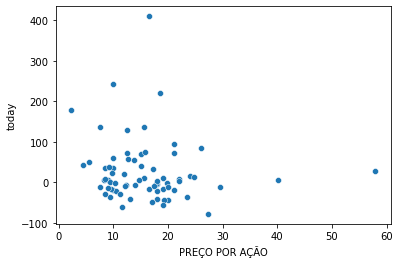

In [23]:
sns.scatterplot(data=detailed, x='PREÇO POR AÇÃO', y= 'today')

In [24]:
DF = detailed[['PREÇO POR AÇÃO', 'today']]

In [25]:
kmeans = KMeans(n_clusters=3)

In [26]:
kmeans.fit(DF)

KMeans(n_clusters=3)

In [27]:
kmeans.labels_

array([1, 0, 0, 2, 0, 2, 2, 0, 2, 0, 0, 2, 1, 0, 1, 2, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 2, 1, 0, 2, 2,
       0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0])

#### K-Means chart

<AxesSubplot:xlabel='PREÇO POR AÇÃO', ylabel='today'>

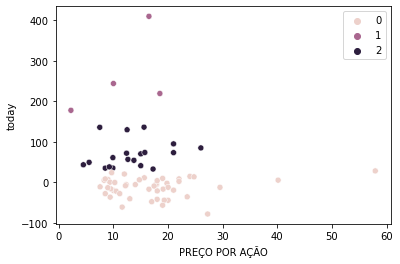

In [28]:
sns.scatterplot(data=DF, x="PREÇO POR AÇÃO", y="today", hue=kmeans.labels_)

Esse é um dos gráficos feitos e pode-se perceber a ausência de grupos formados (caso queira alterar os eixos, ok) em praticamente todos os pares formados, além de uma correlação muito próxima de 0.